In [1]:
from augmentation import read_image, display_image, change_brightness_slightly, change_brightness_not_so_slightly, dropout, adjust_contrast, grayscale, noise, blur, sharpen

In [2]:
image_width = 250#416
image_height = 250#416

inputshape = (image_width, image_height)

test_image = r'.\VOCdevkit\VOC2007\JPEGImages\000019.jpg'

In [3]:
image = read_image(test_image, inputshape)

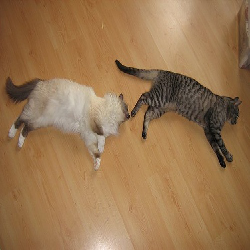

In [4]:
display_image(image)

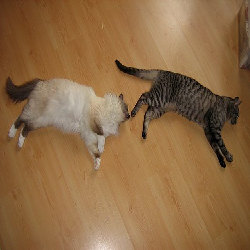

In [5]:
image = read_image(test_image, inputshape)
brightnessmini = change_brightness_slightly(image, (-30, 30))
display_image(brightnessmini)

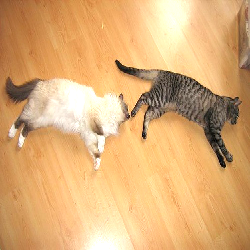

In [17]:
image = read_image(test_image, inputshape)
brightnessmega = change_brightness_not_so_slightly(image, (0.5, 1.5))
display_image(brightnessmega)

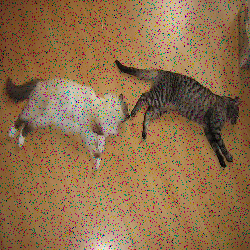

In [7]:
image = read_image(test_image, inputshape)
dropped = dropout(image, (0.1))
display_image(dropped)

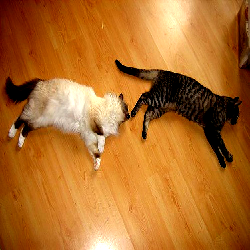

In [16]:
image = read_image(test_image, inputshape)
contrast = adjust_contrast(image, (-100, 100))
display_image(contrast)

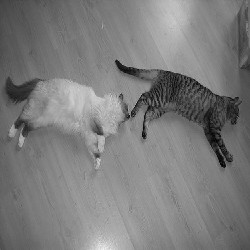

In [9]:
image = read_image(test_image, inputshape)
gray = grayscale(image)
display_image(gray)

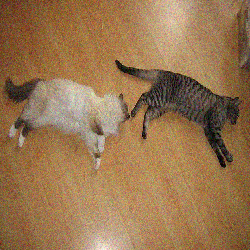

In [18]:
image = read_image(test_image, inputshape)
noisy = noise(image)
display_image(noisy)

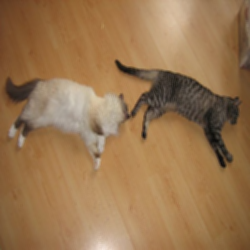

In [11]:
image = read_image(test_image, inputshape)
blurred = blur(image)
display_image(blurred)

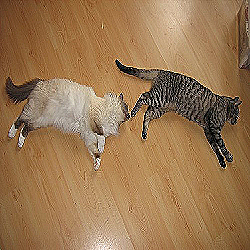

In [12]:
image = read_image(test_image, inputshape)
sharpened = sharpen(image)
display_image(sharpened)